In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("HR_ANALYSIS.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [20]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
df.drop('date', axis = 1, inplace = True)

KeyError: "['date'] not found in axis"

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [23]:
df = df.dropna(axis = 0)

In [24]:
df.iloc[:, -1 :].value_counts()

is_promoted
0              44428
1               4232
dtype: int64

In [25]:
df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

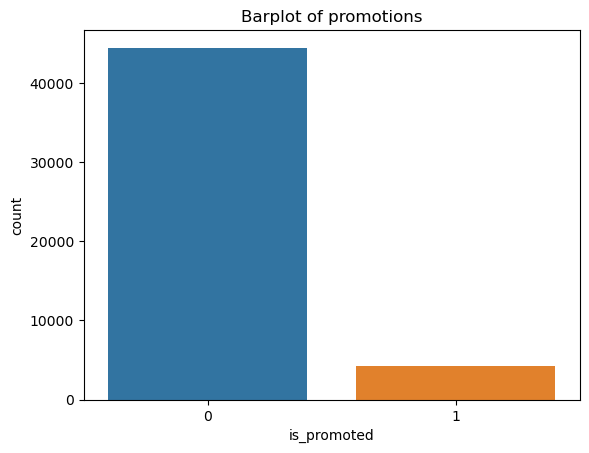

In [26]:
sns.countplot(x = 'is_promoted', data = df)
plt.title('Barplot of promotions')
plt.show()

/var/folders/yx/hh_5_m5x7sxb0sw5p76r2_mr0000gn/T/ipykernel_10598/3066571844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


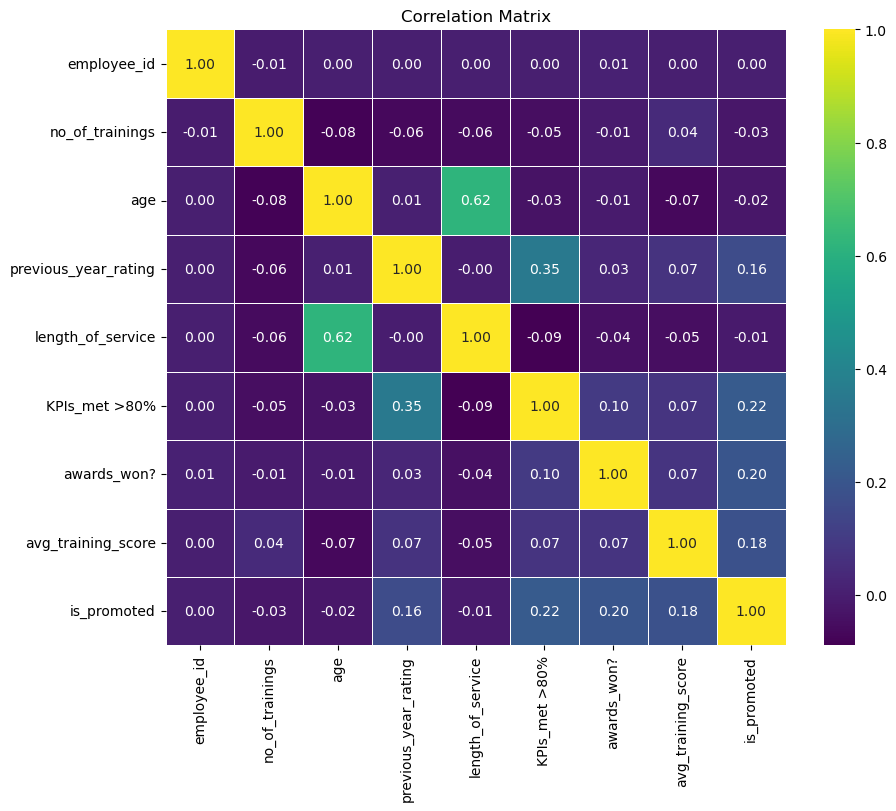

In [27]:
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

In [30]:
df['department'] = label_encoder.fit_transform(df['department'])
df['region'] = label_encoder.fit_transform(df['region'])
df['education'] = label_encoder.fit_transform(df['education'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['recruitment_channel'] = label_encoder.fit_transform(df['recruitment_channel'])

/var/folders/yx/hh_5_m5x7sxb0sw5p76r2_mr0000gn/T/ipykernel_10598/1641285131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = label_encoder.fit_transform(df['department'])
/var/folders/yx/hh_5_m5x7sxb0sw5p76r2_mr0000gn/T/ipykernel_10598/1641285131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = label_encoder.fit_transform(df['region'])
/var/folders/yx/hh_5_m5x7sxb0sw5p76r2_mr0000gn/T/ipykernel_10598/1641285131.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [31]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
def class_report(yt, yp):
    return pd.DataFrame(classification_report(yt, yp, output_dict = True)).transpose()

In [34]:
# Confusion Matrix function
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    
    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'viridis', fmt = '0.2f', annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Apple Quality Classification')
    plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

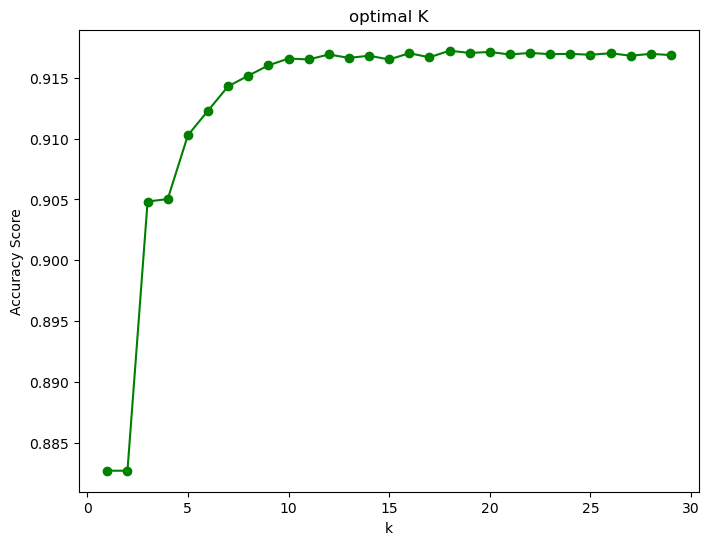

In [36]:
k_values = [i for i in range(1, 30)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    score = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 5)
    scores.append(np.mean(score))

plt.figure(figsize = (8,6))
plt.plot(k_values, scores, c = 'green', marker = 'o')
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('optimal K')
plt.show()

In [37]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print(f"So an optimal k is {best_k}")

So an optimal k is 18


In [38]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=6, weights='distance')

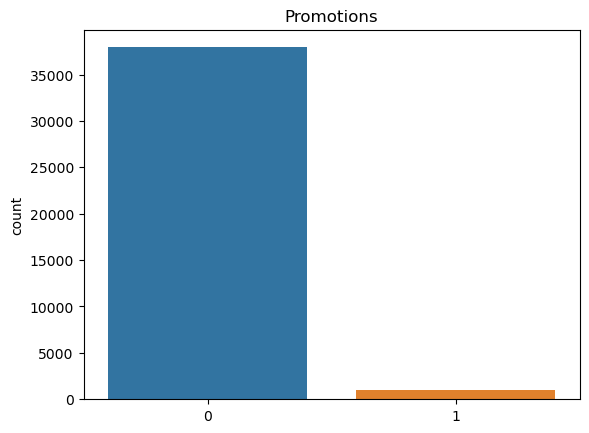

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_prob = cross_val_predict(knn, X_train, y_train.values.ravel())
sns.countplot(x = y_train_prob)
plt.title('Promotions')
plt.show()

In [40]:
class_report(y_train, y_train_prob)

,precision,recall,f1-score,support
0,0.923405,0.985707,0.953540,35542.0000
1,0.485830,0.141760,0.219479,3386.0000
accuracy,0.912300,0.912300,0.912300,0.9123
macro avg,0.704618,0.563734,0.586509,38928.0000
weighted avg,0.885345,0.912300,0.889690,38928.0000


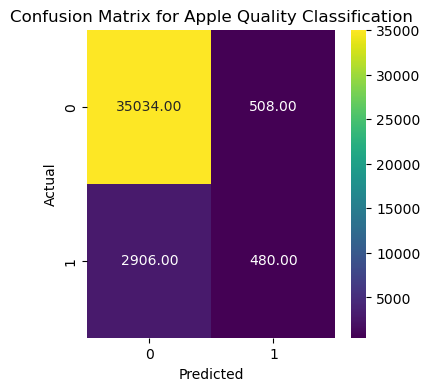

In [41]:
conf_matrix(y_train, y_train_prob)

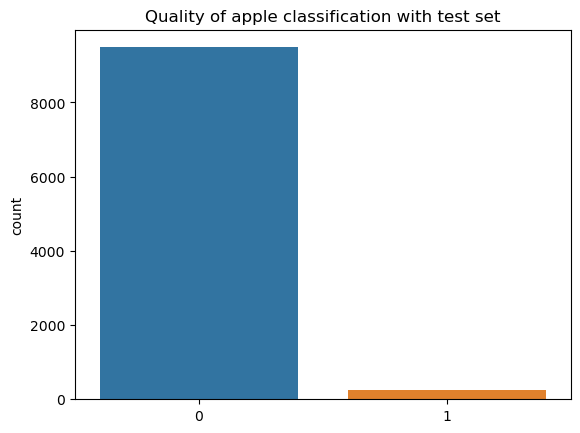

In [42]:
y_prob = knn.predict(X_test)
sns.countplot(x = y_prob)
plt.title('Quality of apple classification with test set')
plt.show()

In [43]:
class_report(y_test, y_prob)

,precision,recall,f1-score,support
0,0.923239,0.985370,0.953293,8886.000000
1,0.475806,0.139480,0.215722,846.000000
accuracy,0.911837,0.911837,0.911837,0.911837
macro avg,0.699523,0.562425,0.584508,9732.000000
weighted avg,0.884344,0.911837,0.889177,9732.000000


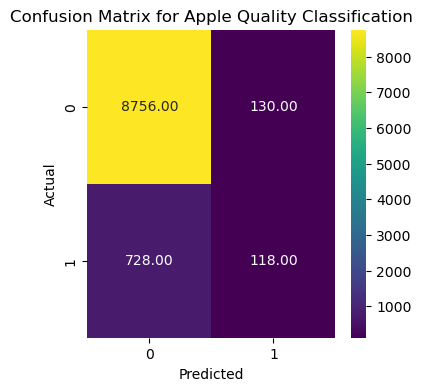

In [44]:
conf_matrix(y_test, y_prob)